In [ ]:
#Библиотеки
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (8, 6)


In [ ]:
# Загрузка датасета
df = pd.read_csv("fake_news.csv")

print(df.shape)
df.head()


(6335, 4)


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
# Оставляем только нужные столбцы
df = df[['text', 'label']]

# Удаляем строки с пустым текстом или меткой
df = df.dropna(subset=['text', 'label'])

# Смотрим, какие уникальные метки есть
print(df['label'].value_counts())


label
REAL    3171
FAKE    3164
Name: count, dtype: int64


In [ ]:
#Разделение на train/test
X = df['text']          # признаки (сырой текст)
y = df['label']         # целевая переменная

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% на тест
    random_state=42,
    stratify=y          # сохраняем пропорцию классов
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])


Train size: 5068
Test size: 1267


In [ ]:
#Преобразование текста
tfidf = TfidfVectorizer(
    stop_words='english',     # убрать английские стоп-слова
    max_df=0.7                # игнорировать слишком частые слова
)

# Обучаем vectorizer на train и сразу преобразуем train
X_train_tfidf = tfidf.fit_transform(X_train)

# Для test используем уже обученный vectorizer
X_test_tfidf = tfidf.transform(X_test)

print("Размер матрицы TF-IDF (train):", X_train_tfidf.shape)
print("Размер матрицы TF-IDF (test): ", X_test_tfidf.shape)


Размер матрицы TF-IDF (train): (5068, 61595)
Размер матрицы TF-IDF (test):  (1267, 61595)


In [ ]:
#Обучение
pac = PassiveAggressiveClassifier(max_iter=1000, random_state=42)
pac.fit(X_train_tfidf, y_train)


PassiveAggressiveClassifier(random_state=42)

In [ ]:
#Оцениваем качество
# Предсказания на тестовой выборке
y_pred = pac.predict(X_test_tfidf)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy на тестовой выборке: {acc:.4f}")

# Дополнительно — подробный отчёт
print("\nClassification report:")
print(classification_report(y_test, y_pred))


Accuracy на тестовой выборке: 0.9408

Classification report:
              precision    recall  f1-score   support

        FAKE       0.94      0.94      0.94       633
        REAL       0.94      0.94      0.94       634

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267



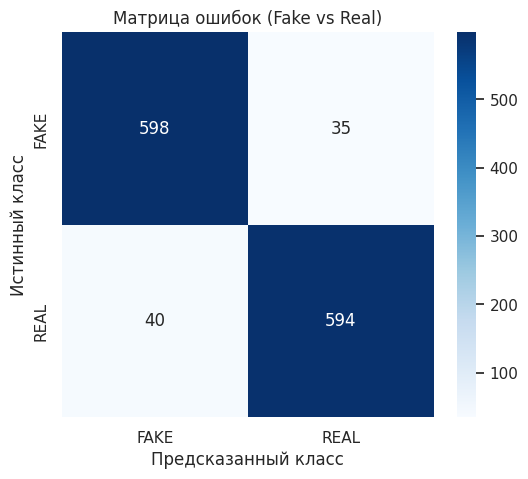

In [ ]:
#Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
cm


plt.figure(figsize=(6, 5))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=pac.classes_,
            yticklabels=pac.classes_)
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title('Матрица ошибок (Fake vs Real)')
plt.show()



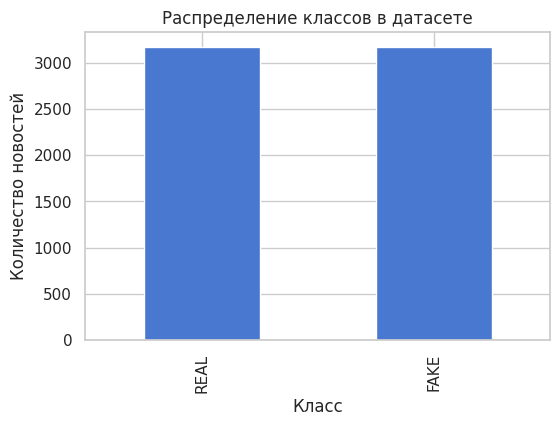

In [ ]:
#Дополнительные графики
#Распределение классов в датасете
plt.figure(figsize=(6, 4))
df['label'].value_counts().plot(kind='bar')
plt.title('Распределение классов в датасете')
plt.xlabel('Класс')
plt.ylabel('Количество новостей')
plt.show()
